In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [41]:
df = pd.read_csv("C:\\AIdata\\diabetes.csv")

In [42]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [43]:
df.shape

(768, 9)

In [53]:
if df.isnull().values.any():
    print("데이터에 결측치가 있습니다.")
else:
    print("결측치 없음")

결측치 없음


In [54]:
diabetes = df[df['Outcome'] == 1]
no_diabetes = df[df['Outcome'] == 0]

In [59]:
print(f"Diabetes 데이터 수: {diabetes.shape}")
print(f"No Diabetes 데이터 수: {no_diabetes.shape}")

Diabetes 데이터 수: (268, 9)
No Diabetes 데이터 수: (500, 9)


In [55]:
LABELS = ["No_Diabetes", "Diabetes"]

C:\Users\kgg07\AppData\Local\Temp\ipykernel_13236\4133777129.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Outcome'], sort=True)


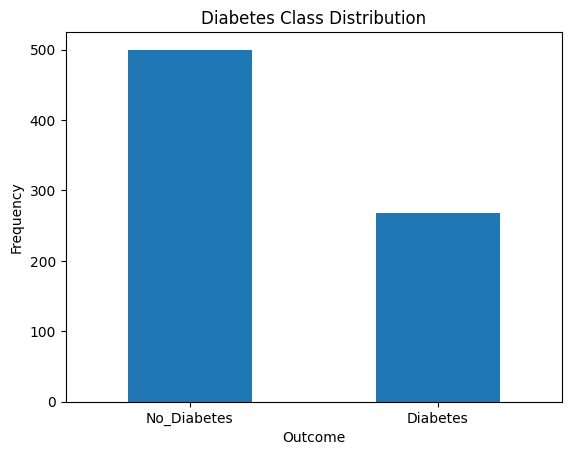

In [57]:
count_classes = pd.value_counts(df['Outcome'], sort=True)

# 클래스 분포 시각화
count_classes.plot(kind='bar', rot=0)
plt.title("Diabetes Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Outcome")
plt.ylabel("Frequency")
plt.show()

diabetes = df[df.Outcome == 1]
no_diabetes = df[df.Outcome == 0]

print("Diabetes 데이터 수:", diabetes.shape)
print("No Diabetes 데이터 수:", no_diabetes.shape)

In [72]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Glucose Level per Outcome')

Text(0.5, 0.98, 'Glucose Level per Outcome')

In [73]:
bins = 50

In [74]:
ax1.hist(diabetes.Glucose, bins=bins, color='red', alpha=0.7)
ax1.set_title('Diabetes')

Text(0.5, 1.0, 'Diabetes')

In [75]:
ax2.hist(no_diabetes.Glucose, bins=bins, color='blue', alpha=0.7)
ax2.set_title('No Diabetes')

Text(0.5, 1.0, 'No Diabetes')

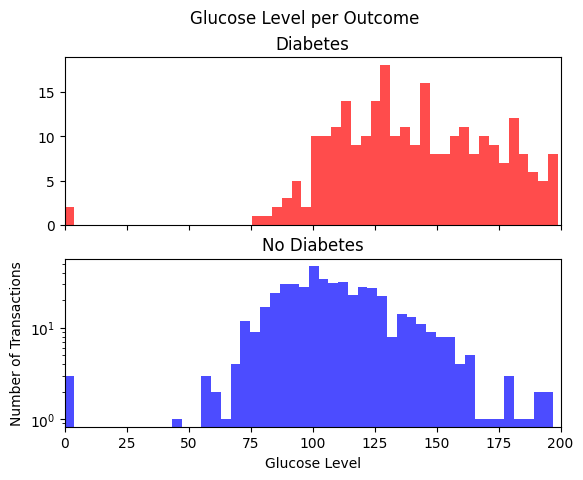

In [76]:
plt.xlabel('Glucose Level')
plt.ylabel('Number of Transactions')  # 변경된 레이블
plt.xlim((0, 200))  # Glucose 값의 범위에 맞게 조정
plt.yscale('log')  # 로그 스케일
plt.show()

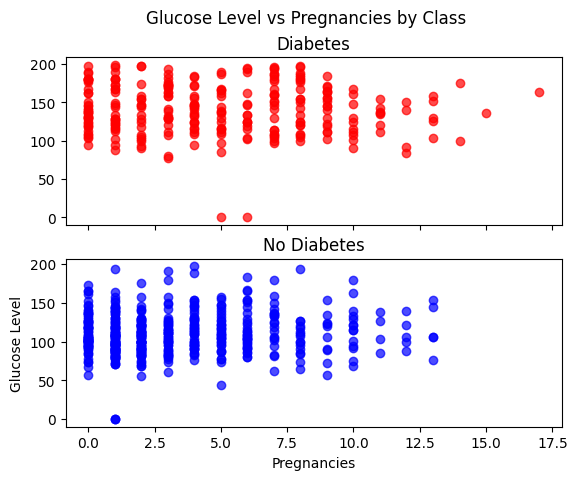

In [77]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Glucose Level vs Pregnancies by Class')

# Diabetes 데이터 산점도
ax1.scatter(diabetes['Pregnancies'], diabetes['Glucose'], alpha=0.7, color='red')
ax1.set_title('Diabetes')

# No Diabetes 데이터 산점도
ax2.scatter(no_diabetes['Pregnancies'], no_diabetes['Glucose'], alpha=0.7, color='blue')
ax2.set_title('No Diabetes')

plt.xlabel('Pregnancies')
plt.ylabel('Glucose Level')
plt.show()

In [78]:
data = df.drop(['Outcome'], axis=1)  # 'Outcome' 열 삭제

In [79]:
data['Glucose'] = StandardScaler().fit_transform(data['Glucose'].values.reshape(-1, 1))

In [80]:
RANDOM_SEED = 42
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)

In [88]:
X_train_normal = X_train[X_train['Outcome'] == 0]

KeyError: 'Outcome'